# Indicadores Técnicos de Tendencia

**Descarga de cotizaciones.**  
Para obtener datos históricos de precios, puedes:

Descargarlos directamente desde las gestoras de los fondos.
Utilizar plataformas públicas como Yahoo Finance mediante la librería yfinance.
yfinance es una herramienta popular en análisis financiero que facilita el acceso a datos históricos considerados de dominio público. Sin embargo, estos datos pueden presentar pequeñas diferencias con respecto a las fuentes oficiales. Por ello, para decisiones críticas, siempre se recomienda contrastar la información con la documentación oficial de la gestora.

⚠️ **Precauciones.**
Este proyecto utiliza yfinance (con licencia bajo la [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).
), una interfaz para descargar datos financieros desde Yahoo Finance. Ten en cuenta lo siguiente:

Los datos descargados son exclusivamente para uso personal.
No está permitido redistribuirlos o venderlos.
Su uso en contextos educativos o sin ánimo de lucro suele ser aceptable, siempre que se cumplan estas condiciones.
Evita realizar peticiones excesivas o abusivas que puedan violar los términos de uso del servicio.



Menú de opciones:
1. Descargar cotizaciones directamente de Yahoo Finances
2. Importar cotizaciones de ficheros csv descargados de Yahoo Finances
3. Importar cotizaciones descargadas de R4
4. Salir



Seleccione una opción (1-4):  2
Ingrese la fecha de inicio (YYYY-MM-DD):  2010-01-04
Ingrese la fecha de fin (YYYY-MM-DD):  2019-12-23
Introduce la ruta completa a la carpeta (e.g., para Linux '/home/tuusuario/Documentos/MisDatos/'):  /home/enri/Python_blog_gestion_conservadora/Datos/Ficheros_Yahoo_csv_all_columns


Archivos CSV disponibles:
1. telefonica.csv
2. dowjons.csv
3. sp500.csv
4. ibex35.csv
5. nikkei225.csv
6. SPY.csv
7. vix.csv
8. prueba.csv
9. san.csv
10. bbva.csv
11. msci.csv
12. iberdrola.csv
13. rep.csv
14. renta4.csv
15. nasdaq.csv
16. Endesa.csv
17. Eurostoxx50.csv


Selecciona un archivo (o 0 para salir):  4



Información del DataFrame:


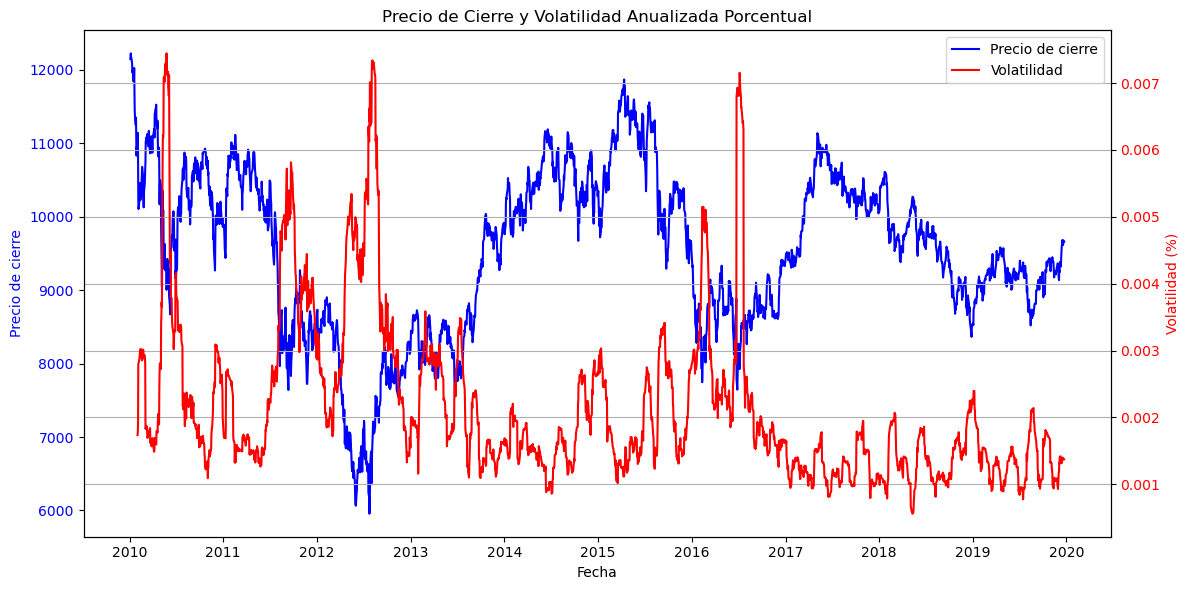


Resumen estadísticos de las cotizaciones. Período del 2010-01-04 00:00:00 al 2019-12-23 00:00:00
**********************************************************************************************************************************

        Media de los precios de cierre: 9515.87
        Desviación estándar de los precios de cierre: 1109.62
        Precio mínimo de cierre: 5956.3
        Precio máximo de cierre: 12222.5
        Último precio de cierre: 9659.6
        Rendimiento acumulado en el período: 0.8
        La volatilidad anualizada final es: 0.00%
        

INDICADORES DE TENDENCIA
**********************************************************************************************************************************

        Número de días transcurridos: 2550
        Número de variaciones >= 0: 1309
        Número de variaciones < 0: 1241
        Cotización máxima en el período: Close    12222.5
dtype: float64 el 2010-01-06
        Cotización mínima en el período: Close    5956.299805


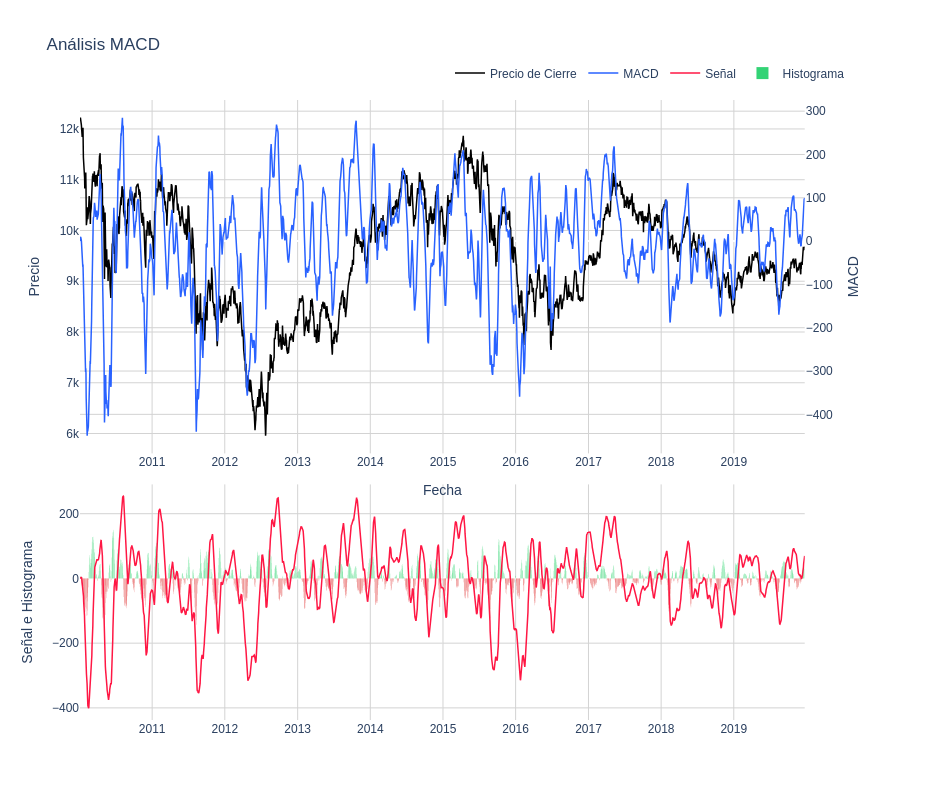

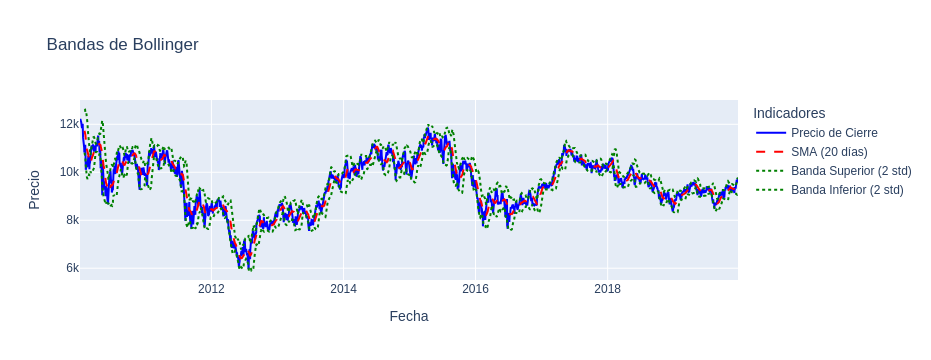

RSI (último valor): 80.03


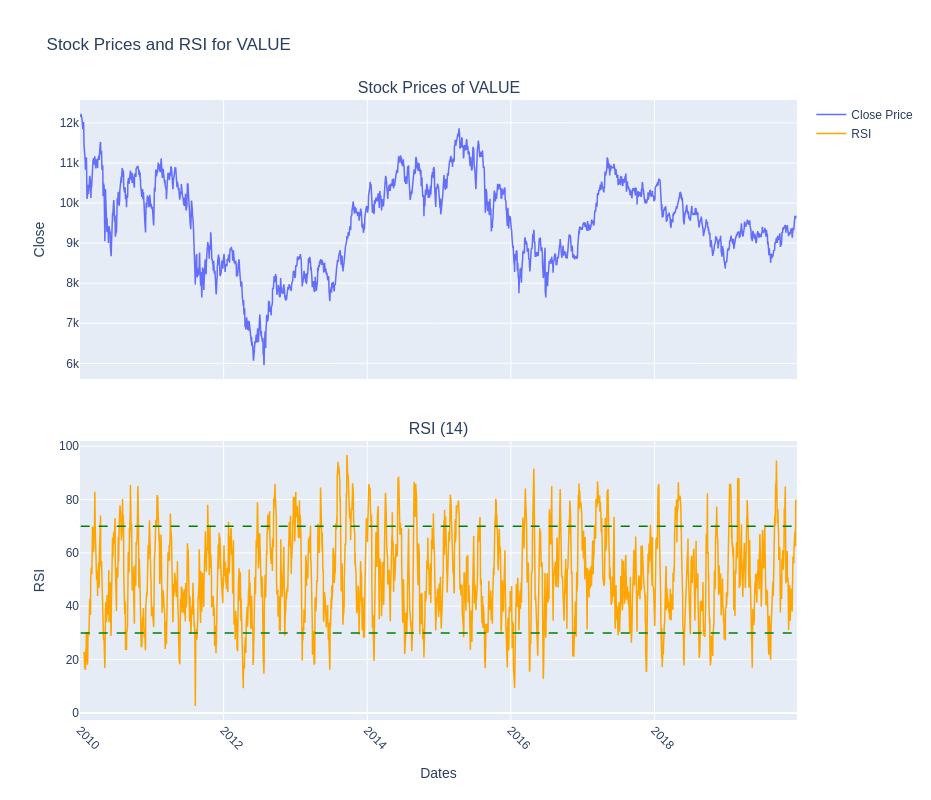


Menú de opciones:
1. Descargar cotizaciones directamente de Yahoo Finances
2. Importar cotizaciones de ficheros csv descargados de Yahoo Finances
3. Importar cotizaciones descargadas de R4
4. Salir


In [ ]:
# Importar directamente  de Yahoo Finances
import os
import yfinance as yf
import pandas as pd
from typing import Dict, Tuple, Optional, Any
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import font

import plotly.graph_objects as go
from plotly.subplots import make_subplots


class ImportarCotizaciones:
    def __init__(self):
        self._data: Dict[str, pd.DataFrame] = {}
        self.all_value_closes = pd.DataFrame()
        self.value_close = pd.DataFrame()
        self.all_benchmark_closes = pd.DataFrame()
        self.benchmark_close = pd.DataFrame()

    def solicitar_datos(self):
        """Solicita los datos necesarios al usuario"""
        self.ticker = self._get_input("Ingrese el ticker del valor: ")
        self.benchmark_ticker = self._get_input("Ingrese el ticker del benchmark (dejar en blanco si no se desea): ", optional=True)
        self.start_date = self._get_input("Ingrese la fecha de inicio (YYYY-MM-DD): ")
        self.end_date = self._get_input("Ingrese la fecha de fin (YYYY-MM-DD): ")
        self._fetch_all_data()
        return self.crear_data_frames()

    def _get_input(self, prompt: str, optional: bool = False) -> str:
        while True:
            value = input(prompt).strip()
            if value or optional:
                return value
            print("Este campo es obligatorio. Por favor, ingréselo.")

    def _download_data(self, ticker: str) -> pd.DataFrame:
        """
        Downloads historical price data for a given ticker symbol.

        This method takes a ticker symbol (`ticker`) as input and uses the `yfinance`
        library to download historical price data for that ticker within the specified
        date range (defined by `self.start_date` and `self.end_date`).

        The downloaded data is converted into a pandas DataFrame (`df`).
        - The index of the DataFrame is converted to datetime format using `pd.to_datetime`.
        - The name of the index is set to 'Date' for clarity.

        The method returns the resulting DataFrame containing the historical price data.

        Args:
            ticker (str): The ticker symbol of the security to download data for
            historical_benchmark_close (st): The ticker symbol of the índex o reference security to download data for

        Returns:
            pd.DataFrame: The DataFrame containing the downloaded historical price data.

        Raises:
            ValueError: If an error occurs during data download.
        """

        try:
            df = yf.download(ticker, start=self.start_date, end=self.end_date, auto_adjust= False, progress=False)
            df.index = pd.to_datetime(df.index)
            df.index.name = 'Date'
            return df
        except Exception as e:
            raise ValueError(f"No se pudieron descargar los datos para {ticker}: {e}")

    def _fetch_all_data(self) -> None:
        """
        Obtiene datos de precios históricos tanto para el ticker especificado como para el ticker del índice.

        Este método itera sobre la lista de tickers y descarga datos de precios históricos para cada uno.
        Los datos descargados se almacenan luego en el atributo `_data`, indexado por el símbolo del ticker.

        La lista [self.ticker, self.historical_benchmark_close] se crea dentro del bucle for.

        Args:
            None

        Returns:
            None
        """
        for ticker in [self.ticker, self.benchmark_ticker]:
            if ticker:  # Solo procesa si el ticker no está vacío
                df = self._download_data(ticker)
                if not df.empty:
                    self._data[ticker] = df

    def format_date_index(self) -> None:
        """
        Formatea el índice de fechas de todos los DataFrames a 'YYYY-MM-DD'.
        """
        for ticker, df in self._data.items():
            df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
            df.index = pd.to_datetime(df.index)

        if self.combined_close_df is not None:
            self.combined_close_df.index = pd.to_datetime(self.combined_close_df.index).strftime('%Y-%m-%d')
            self.combined_close_df.index = pd.to_datetime(self.combined_close_df.index)

    @property
    def combined_close_df(self) -> pd.DataFrame:
        """
        Devuelve un DataFrame que contiene los precios de cierre fusionados del valor y el índice.

        Esta propiedad garantiza que se obtengan los datos si aún no están disponibles.
        """
        if not self._data:
            self._fetch_all_data()

        # Acceder a los datos del ticker principal
        df = self._data[self.ticker][['Close']].copy()
        df.columns = [f'Close_{self.ticker}']

        # Si hay un benchmark_ticker, fusionar con sus datos
        if self.benchmark_ticker:
            benchmark_df = self._data[self.benchmark_ticker][['Close']]
            benchmark_df.columns = [f'Close_{self.benchmark_ticker}']
            df = pd.merge(df, benchmark_df, left_index=True, right_index=True)

        return df

    @property
    def historical_closes(self) -> Dict[str, pd.DataFrame]:
        """
        Returns a dictionary containing all downloaded historical closing prices.

        This property ensures data is fetched if not already available.
        """
        if not self._data:
            self._fetch_all_data()

    def crear_data_frames(self) -> Tuple[pd.DataFrame, pd.DataFrame, Optional[pd.DataFrame], Optional[pd.DataFrame]]:
        """
        Crea y devuelve todos los DataFrames necesarios.

        Returns:
            Tuple conteniendo all_value_closes, value_close, all_benchmark_closes, y benchmark_close
        """
        if not self._data:
            self._fetch_all_data()

        # Formatear los índices de fecha
        self.format_date_index()

        # Seleccionar el nivel de etiqueta de columnas deseado para historical_closes
        for ticker in self._data.keys():
            # Asegúrate de que el DataFrame tenga un MultiIndex en las columnas
            if isinstance(self._data[ticker].columns, pd.MultiIndex):
                # Cambiar 'Price' por el nivel que deseas seleccionar si es necesario
                self._data[ticker].columns = self._data[ticker].columns.get_level_values('Price')

        # Cotizaciones del valor
        self.all_value_closes = self._data[self.ticker]
        self.value_close = self._data[self.ticker][['Close']]

        # Cotizaciones del índice o indicador (si existe)
        if self.benchmark_ticker:
            self.all_benchmark_closes = self._data[self.benchmark_ticker]
            self.benchmark_close = self._data[self.benchmark_ticker][['Close']]
        else:
            self.all_benchmark_closes = None
            self.benchmark_close = None

        return self.all_value_closes, self.value_close, self.all_benchmark_closes, self.benchmark_close

    def get_historical_prices(self) -> Tuple[Dict[str, Any], pd.DataFrame, pd.DataFrame, Optional[pd.DataFrame], Optional[pd.DataFrame]]:
        if not self._data:
            self._fetch_all_data()

        self.format_date_index()

        self.all_value_closes, self.value_close, self.all_benchmark_closes, self.benchmark_close = self.crear_data_frames()

        self.data_dict = {
            'ticker': self.ticker,
            'benchmark_ticker': self.benchmark_ticker,
            'start_date': self.start_date,
            'end_date': self.end_date,
            'all_value_closes': self.all_value_closes,
            'value_close': self.value_close,
            'all_benchmark_closes': self.all_benchmark_closes,
            'benchmark_close': self.benchmark_close
        }

        return (self.data_dict, self.all_value_closes, self.value_close,
                self.all_benchmark_closes, self.benchmark_close)

#--------------------------------------------------------
# Importar cotizaciones de ficheros csv descargados de Yahoo Finances
class ImportarCotizacionesCSV_yf:
    def __init__(self, directory_path: str):
        self.directory_path = directory_path

    def listar_archivos(self):
        """Lista los archivos CSV en el directorio y permite seleccionar uno."""
        files = [f for f in os.listdir(self.directory_path) if f.endswith('.csv')]
        print("Archivos CSV disponibles:")
        for i, file in enumerate(files):
            print(f"{i+1}. {file}")

        while True:
            try:
                choice = int(input("Selecciona un archivo (o 0 para salir): "))
                if choice == 0:
                    return None
                elif 1 <= choice <= len(files):
                    return files[choice-1]
                else:
                    print("Opción inválida. Intenta de nuevo.")
            except ValueError:
                print("Por favor, ingresa un número válido.")

    def crear_data_frame(self, file_name):
        """Crea un DataFrame a partir del archivo seleccionado."""
        file_path = os.path.join(self.directory_path, file_name)
        df =  pd.read_csv(
            file_path,
            sep=",",  # Yahoo usa comas como separador
            parse_dates=True,
            index_col="Date"  # La columna de fecha en Yahoo se llama "Date"
        )
        # Convertir el índice a datetime y formatearlo
        df.index = pd.to_datetime(df.index)
        df.index.name = 'Date'
        df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
        df.index = pd.to_datetime(df.index)

        # Crear copias de los DataFrames
        self.all_value_closes = df.copy()
        self.value_close = self.all_value_closes[['Close']]

        # Devuelve los DataFrames
        return self.all_value_closes, self.value_close

#--------------------------------------------------------
#importar cotizaciones de ficheros csv descargados de R4
class ImportarCotizacionesCSV_r4:
    def __init__(self, directory_path: str):
        self.directory_path = directory_path

    def listar_archivos(self):
        """Lista los archivos CSV en el directorio y permite seleccionar uno."""
        files = [f for f in os.listdir(self.directory_path) if f.endswith('.csv')]
        print("Archivos CSV disponibles:")
        for i, file in enumerate(files):
            print(f"{i+1}. {file}")

        while True:
            try:
                choice = int(input("Selecciona un archivo (o 0 para salir): "))
                if choice == 0:
                    return None
                elif 1 <= choice <= len(files):
                    return files[choice-1]
                else:
                    print("Opción inválida. Intenta de nuevo.")
            except ValueError:
                print("Por favor, ingresa un número válido.")

    def crear_data_frame(self, file_name):
        """Crea un DataFrame a partir del archivo seleccionado."""
        file_path = os.path.join(self.directory_path, file_name)

        try:
            # Leer el archivo con separador de espacio en blanco y nombres de columna explícitos
            df = pd.read_csv(
                file_path,
                delim_whitespace=True,  # Usar cualquier espacio en blanco como delimitador
                names=['Date', 'Close'],  # Nombres explícitos de las columnas
                decimal=",",  # Usar la coma como separador decimal
                skiprows=1  # Saltar la fila de encabezado
            )

            # Limpiar la comilla y convertir a datetime
            df['Date'] = df['Date'].str.replace("'", "")
            df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')  # Especificamos el formato y convertimos las fechas inválidas en NaT

        except KeyError as e:
            # Manejar columnas faltantes
            print(f"Error: Missing columns in '{file_name}': {e}")
            print("Expected columns: 'Date', 'Close'")
            return None  # O lanzar una excepción específica

        # Eliminar filas con fechas inválidas
        df = df.dropna(subset=['Date'])

        # Establecer la columna 'Date' como índice
        df.set_index('Date', inplace=True)

        # Crear copias de los DataFrames
        self.all_value_closes = df.copy()
        self.value_close = self.all_value_closes[['Close']]

        # Devuelve los DataFrames
        return self.all_value_closes, self.value_close

#--------------------------------------------------------
# Calcular Indicadores de Tendencia
class CalculaIndicadoresTendencia:
    def __init__(self, data_source=None, **kwargs):
        # Initialize diagnostic attributes
        self.diagnostico = ""
        self.cuenta_menor = 0
        self.cuenta_mayor = 0
        self.media_subidas = 0
        self.medias_bajadas = 0
        self.cotiz_max = 0
        self.cotiz_min = 0
        self.fecha_cotiz_max = None
        self.fecha_cotiz_min = None

        # Initialize data based on input type
        # Verifica si data_source es un diccionario.
        if isinstance(data_source, dict):
            self._init_from_csv_data(data_source)
        # Verifica si data_source tiene un atributo llamado 'ticker'
        elif hasattr(data_source, 'ticker'):
            self._init_from_quotes(data_source)
        # Comprueba si data_source es un DataFrame de pandas.
        #  y pasa cualquier argumento adicional con **kwargs.
        elif isinstance(data_source, pd.DataFrame):
            self._init_from_dataframe(data_source, **kwargs)
        else:
            self._init_from_dataframes(**kwargs)

    def _init_from_dataframe(self, df, **kwargs):
        """Inicializa la instancia a partir de un DataFrame"""
        self.quotes = None
        self.ticker = kwargs.get('ticker', 'VALUE')
        self.benchmark_ticker = kwargs.get('benchmark_ticker', None)
        self.start_date = kwargs.get('start_date', df.index[0])
        self.end_date = kwargs.get('end_date', df.index[-1])

        # Asignar el DataFrame directamente
        self.value_close = df
        self.all_value_closes = df

        # Si hay un benchmark DataFrame, asignarlo
        benchmark_df = kwargs.get('benchmark_df', None)
        if benchmark_df is not None:
            self.all_benchmark_closes = benchmark_df
            self.benchmark_close = benchmark_df
        else:
            self.all_benchmark_closes = None
            self.benchmark_close = None

    def _init_from_quotes(self, quotes):
        """Inicializa la instancia a partir de un objeto quotes"""
        self.quotes = quotes
        self.ticker = quotes.ticker
        self.benchmark_ticker = quotes.benchmark_ticker
        self.start_date = quotes.start_date
        self.end_date = quotes.end_date
        self.all_value_closes = quotes.all_value_closes
        self.value_close = quotes.value_close
        self.all_benchmark_closes = quotes.all_benchmark_closes
        self.benchmark_close = quotes.benchmark_close

    def _init_from_csv_data(self, data_dict):
        """Inicializa la instancia a partir de datos CSV"""
        first_key = list(data_dict.keys())[0]
        self.quotes = None
        self.ticker = first_key
        self.benchmark_ticker = list(data_dict.keys())[1] if len(data_dict) > 1 else None
        self.all_value_closes = data_dict[first_key]
        self.value_close = self.all_value_closes[['Close']]
        if self.benchmark_ticker:
            self.all_benchmark_closes = data_dict[self.benchmark_ticker]
            self.benchmark_close = self.all_benchmark_closes[['Close']]
        self.start_date = self.value_close.index[0]
        self.end_date = self.value_close.index[-1]

    def _init_from_dataframes(self, **kwargs):
        """Inicializa la instancia a partir de DataFrames"""
        value_close = kwargs.get('value_close')
        if value_close is None:
            raise ValueError("value_close is required")

        self.quotes = None
        self.ticker = kwargs.get('ticker', 'VALUE')
        self.benchmark_ticker = kwargs.get('benchmark_ticker', 'BENCHMARK')
        self.all_value_closes = value_close
        self.value_close = value_close
        self.start_date = kwargs.get('start_date', value_close.index[0])
        self.end_date = kwargs.get('end_date', value_close.index[-1])

        benchmark_df = kwargs.get('benchmark_df')
        if benchmark_df is not None:
            self.all_benchmark_closes = benchmark_df
            self.benchmark_close = benchmark_df

    def calculate_ratios(self):
        self.calculate_returns()
        self.calculate_variations()
        self.cuenta_variaciones()
        self.calculate_volatility()
        self.calculate_returns()
        self.calc_cotiz_MediaMaxMin()
        self.calc_dias_transcurridos()
        self.convertir_a_rendimientos_mensuales()
        self.calcular_mejor_rto_mensual()
        self.calcular_peor_rto_mensual()
        self.calcular_porcentaje_meses_rentables()
        self.convertir_a_rendimientos_mensuales()
        self.calcular_mejor_rto_mensual()
        self.calcular_peor_rto_mensual()
        self.calcular_porcentaje_meses_rentables()
        self.calcular_media_retornos_positivos()
        self.calcular_media_retornos_negativos()
        self.calcular_tabla_rtos_mensuales()
        self.get_summary_stats()  # Asegúrate de que esto se llame antes de imprime_indicadores
        self.calcular_media_retornos_positivos()
        self.calcular_media_retornos_negativos()
        self.calcular_tabla_rtos_mensuales()

        self.imprime_indicadores()
        self.semaforo()
        self.imprimir_advertencia()

        self.calculate_macd()
        self.plot_macd_plotly()

        self.calculate_bollinger()
        self.plot_bollinger_plotly()

        self.calculate_rsi(periods=14)
        self.plot_rsi_plotly()

    #---------------------------------------------------

    def calculate_returns(self):
        """Calculates returns and variations"""
        df = self.value_close.copy()
        close = df['Close']

        df['Variations'] = close.diff()
        df['Cum_variations'] = df['Variations'].cumsum()
        df['Daily_returns'] = close.pct_change()
        df['Log_returns'] = np.log1p(df['Daily_returns'])
        df['Cum_daily_returns'] = (1 + df['Daily_returns']).cumprod()
        df['Cum_log_returns'] = df['Log_returns'].cumsum().apply(np.exp)

        self.df_value_returns = df.dropna()
        return self.df_value_returns

    def calculate_volatility(self, window=20):
        """
        Calcula la volatilidad móvil y genera un gráfico con volatilidad y precios

        Parameters:
        window (int): Ventana para el cálculo de volatilidad
        """

        # Cálculo de los retornos logarítmicos
        returns = np.log(self.value_close).diff()

        # Cálculo de la volatilidad anualizada
        self.volatilidad_anualizada = returns.rolling(window).std() * np.sqrt(252)

        # Cálculo de la volatilidad porcentual
        self.volatilidad_porcentual = (self.volatilidad_anualizada / self.value_close.values) * 100

        # Si solo quieres el último valor de volatilidad:
        self.ultima_volatilidad = self.volatilidad_porcentual.iloc[-1].item()

        # Crear la figura con dos ejes Y
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Gráfico de precios (eje Y izquierdo)
        ax1.plot(self.value_close.index, self.value_close, color='blue', label='Precio de cierre')
        ax1.set_xlabel('Fecha')
        ax1.set_ylabel('Precio de cierre', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Gráfico de volatilidad (eje Y derecho)
        ax2 = ax1.twinx()
        ax2.plot(self.volatilidad_porcentual.index, self.volatilidad_porcentual, color='red', label='Volatilidad')
        ax2.set_ylabel('Volatilidad (%)', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        # Título y leyenda
        plt.title('Precio de Cierre y Volatilidad Anualizada Porcentual')
        fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

        # Ajustar el diseño y mostrar la gráfica
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return self.volatilidad_porcentual, self.ultima_volatilidad

    def get_summary_stats(self):
        """
        Calcula estadísticas descriptivas de los precios de cierre.

        Returns:
          dict: Diccionario con las siguientes estadísticas:
              - 'mean': Media de los precios de cierre.
              - 'std': Desviación estándar de los precios de cierre.
              - 'min': Precio mínimo de cierre.
              - 'max': Precio máximo de cierre.
              - 'last_price': Último precio de cierre.
              - 'total_days': Número total de días con datos de precios.
        """
        # Utilizando .describe() para obtener muchas estadísticas de una vez
        self.stats = self.value_close.describe()

        # Creando un diccionario con las estadísticas deseadas
        return {
          'mean': self.stats.mean,
          'std': self.stats.std,
          'min': self.stats.min,
          'max': self.stats.max,
          'last_price': self.value_close.iloc[-1],  # Último precio
          'total_days': len(self.value_close)
        }
    #_____________________________________________________
    def calculate_variations(self):
        self.df_returns = self.value_close.copy()
        # Variaciones del precio
        self.df_returns["Variations"] = self.df_returns['Close'].diff()
        self.df_returns['cum_variations'] = self.df_returns['Variations'].cumsum()

        # Retornos diarios
        self.df_returns['Daily_returns'] = np.log(self.df_returns['Close'] / self.df_returns['Close'].shift())
        self.df_returns['Cum_daily_returns'] = self.df_returns['Daily_returns'].cumsum().apply(np.exp)

        # Retornos logarítmicos
        self.df_returns["Log_returns"] = np.log(self.df_returns['Close'] / self.df_returns['Close'].shift(1)).dropna()
        self.df_returns["Cum_log_returns"] = self.df_returns["Log_returns"].cumsum().apply(np.exp)
        self.df_returns.dropna(inplace=True)
        return self.df_returns

    def cuenta_variaciones(self):
        self.df_returns = self.df_returns.dropna()
        # Cálculo del número de días transcurridos
        self.dias_transcurridos = len(self.df_returns)

        # Cuenta variaciones
        self.cuenta_mayor = self.df_returns['Daily_returns'][self.df_returns['Daily_returns'] >= 0].count()
        self.cuenta_menor = self.df_returns['Daily_returns'][self.df_returns['Daily_returns'] < 0].count()
        return self.dias_transcurridos, self.cuenta_mayor, self.cuenta_menor

    def calc_cotiz_MediaMaxMin(self):
        """Calculate max and min values with their dates"""
        if isinstance(self.value_close, pd.DataFrame):
            closes = self.value_close
        else:
            closes = self.value_close

        # Get max and min values
        self.cotiz_max = closes.max()
        self.cotiz_min = closes.min()

        # Get dates for max and min values
        max_idx = closes.idxmax()
        min_idx = closes.idxmin()

        # Ensure max_idx and min_idx are scalar values
        if isinstance(max_idx, pd.Series):
            max_idx = max_idx.iloc[0]
        if isinstance(min_idx, pd.Series):
            min_idx = min_idx.iloc[0]

        # Format dates properly
        self.fecha_cotiz_max = pd.to_datetime(max_idx).strftime('%Y-%m-%d')
        self.fecha_cotiz_min = pd.to_datetime(min_idx).strftime('%Y-%m-%d')

    def calc_dias_transcurridos(self):
        #start_date = datetime.strptime(market_data.start_date, "%Y-%m-%d")
        #end_date = datetime.strptime(market_data.end_date, "%Y-%m-%d")
        self.dias_transcurridos = len(self.value_close)

    def convertir_a_rendimientos_mensuales(self):
        # Convertir los rendimientos diarios a rendimientos mensuales
        self.df_returns_monthly = self.df_value_returns.resample('ME').sum()
        self.df_returns_monthly.dropna(inplace=True)

    def calcular_mejor_rto_mensual(self):
        self.mejor_mes = np.max(self.df_returns_monthly['Log_returns'])
        # Puedes hacer más operaciones o imprimir el resultado aquí

    def calcular_peor_rto_mensual(self):
        self.peor_mes = np.min(self.df_returns_monthly['Log_returns'])
        # Puedes hacer más operaciones o imprimir el resultado aquí

    def calcular_porcentaje_meses_rentables(self):
        variaciones_totales = self.df_returns_monthly['Log_returns']
        meses_positivos = 0
        meses_negativos = 0
        meses_planos = 0

        for value in variaciones_totales:
            if value > 0:
                meses_positivos += 1
            elif value < 0:
                meses_negativos += 1
            else:
                meses_planos += 1

        self.perc_meses_positivos = meses_positivos / len(variaciones_totales) * 100
        self.perc_meses_negativos = meses_negativos / len(variaciones_totales) * 100

    def calcular_media_retornos_positivos(self):
        retornos_positivos = self.df_returns[self.df_returns['Log_returns'] > 0]['Log_returns']
        self.media_variaciones_positivas = retornos_positivos.mean() * 100

    def calcular_media_retornos_negativos(self):
        retornos_negativos = self.df_returns[self.df_returns['Log_returns'] < 0]['Log_returns']
        self.media_variaciones_negativas = retornos_negativos.mean() * 100

    def calcular_tabla_rtos_mensuales(self):
        # Crear una copia de los retornos logarítmicos mensuales
        df_val_mes = self.df_returns_monthly["Log_returns"].copy()

        # Agrupar por año y mes, luego desapilar para crear una tabla
        self.tabla_mensual = df_val_mes.groupby([df_val_mes.index.year, df_val_mes.index.month]).sum().unstack()

        # Asegurarse de que todas las columnas de meses estén presentes
        for month in range(1, 13):
            if month not in self.tabla_mensual.columns:
                self.tabla_mensual[month] = np.nan

        # Reordenar las columnas y renombrarlas
        self.tabla_mensual = self.tabla_mensual.reindex(columns=range(1, 13))
        self.tabla_mensual.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        # Ordenar el índice (años) de forma ascendente
        self.tabla_mensual = self.tabla_mensual.sort_index()

        return self.tabla_mensual


    def calculate_macd(self):
        """
        Calculate the Moving Average Convergence Divergence (MACD).
        """
        if not isinstance(self.value_close, pd.Series):
            if 'Close' in self.value_close.columns:
                close = self.value_close['Close']
            else:
                raise ValueError("value_close debe ser una Serie o un DataFrame con una columna 'Close'")
        else:
            close = self.value_close

        # Calculate the 12-period and 26-period exponential moving averages
        ema_12 = self.value_close['Close'].ewm(span=12, adjust=False).mean()
        ema_26 = self.value_close['Close'].ewm(span=26, adjust=False).mean()

        # Calculate the MACD line
        self.macd = ema_12 - ema_26

        # Calculate the signal line (9-period EMA of MACD)
        signal_line = self.macd.ewm(span=9, adjust=False).mean()

        # Calculate the MACD histogram
        self.macd_hist = self.macd - signal_line

        print(f"MACD (último valor): {self.macd.iloc[-1]:.4f}")
        print(f"MACD Histogram (último valor): {self.macd_hist.iloc[-1]:.4f}")

    def calculate_rsi(self, periods=14):
        """
        Calculate the Relative Strength Index (RSI).

        Args:
            periods (int): The number of periods to use for RSI calculation. Default is 14.
        """
        try:
            # Convertir a Serie si es necesario
            if not isinstance(self.value_close, pd.Series):
                if 'Close' in self.value_close.columns:
                    close = self.value_close['Close']
                else:
                    raise ValueError("value_close debe ser una Serie o un DataFrame con una columna 'Close'")
            else:
                close = self.value_close

            # Calculate price changes
            delta = close.diff()

            # Separate gains and losses
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)

            # Calculate average gains and losses
            avg_gain = gain.rolling(window=periods).mean()
            avg_loss = loss.rolling(window=periods).mean()

            # Calculate RS and RSI
            rs = avg_gain / avg_loss
            self.rsi = 100 - (100 / (1 + rs))

            # Guardar el último valor del RSI para fácil acceso
            self.rsi_ultimo = float(self.rsi.iloc[-1]) if not self.rsi.empty else None

            print(f"RSI (último valor): {self.rsi_ultimo:.2f}")

        except Exception as e:
            print(f"Error al calcular RSI: {str(e)}")
            self.rsi = None
            self.rsi_ultimo = None

    def calculate_bollinger(self, window=20, n_std=2):
        """
        Calculates Bollinger Bands for the given DataFrame.

        Sets the following attributes:
          - self.sma: Simple Moving Average
          - self.std: Standard Deviation
          - self.upper_band: Upper Bollinger Band
          - self.lower_band: Lower Bollinger Band

        This function assumes that the DataFrame has a 'Close' column.
        """
        self.df = self.value_close.copy()
        # Ensure 'Close' column exists
        if 'Close' not in self.df.columns:
            raise ValueError("DataFrame must have a 'Close' column")

        self.sma = self.df["Close"].rolling(window).mean()
        self.std = self.df["Close"].rolling(window).std()
        self.upper_band = self.sma + n_std * self.std
        self.lower_band = self.sma - n_std * self.std

        # Opcional: agregar atributos para window y n_std
        self.window = window
        self.n_std = n_std



    def print_header_0(self, text):
        print(f"\n{Back.YELLOW}{Fore.BLUE}{text}{Style.RESET_ALL}")
        print("*" * 130)

    def print_header(self, text):
        # Use standard print escape sequences for color instead of undefined constants
        print(f"\n\033[33m\033[94m{text}\033[0m")
        print("*" * 130)

    def print_section(self, title, content):
        self.print_header(title)
        print(content)

    def format_stats(self):
        return f"""
        Media de los precios de cierre: {round(self.stats.loc['mean', 'Close'], 2)}
        Desviación estándar de los precios de cierre: {round(self.stats.loc['std', 'Close'], 2)}
        Precio mínimo de cierre: {round(self.stats.loc['min', 'Close'], 2)}
        Precio máximo de cierre: {round(self.stats.loc['max', 'Close'], 2)}
        Último precio de cierre: {round(self.value_close['Close'].iloc[-1], 2)}
        Rendimiento acumulado en el período: {round(self.df_returns["Cum_log_returns"].iloc[-1], 2)}
        La volatilidad anualizada final es: {self.ultima_volatilidad:.2f}%
        """

    def format_trend_indicators(self):
        return f"""
        Número de días transcurridos: {len(self.df_returns)}
        Número de variaciones >= 0: {self.cuenta_mayor}
        Número de variaciones < 0: {self.cuenta_menor}
        Cotización máxima en el período: {self.cotiz_max} el {self.fecha_cotiz_max}
        Cotización mínima en el período: {self.cotiz_min} el {self.fecha_cotiz_min}
        % Promedio de las subidas: {round(self.media_variaciones_positivas, 3)}
        % Promedio de las bajadas: {round(self.media_variaciones_negativas, 3)}
        """

    def imprime_indicadores(self):
        self.print_section(f"Resumen estadísticos de las cotizaciones. Período del {self.start_date} al {self.end_date}", self.format_stats())
        self.print_section("INDICADORES DE TENDENCIA", self.format_trend_indicators())
        self.print_section("MEJOR RENDIMIENTO MENSUAL", f"% cambio mejor mes = {round(self.mejor_mes*100, 2)}%")
        self.print_section("PEOR RENDIMIENTO MENSUAL", f"% cambio peor mes = {round(self.peor_mes*100, 2)}%")
        self.print_section("PORCENTAJE DE MESES RENTABLES",
                           f"% meses_positivos {round(self.perc_meses_positivos,2)}, % meses negativos {round(self.perc_meses_negativos,2)}")
        self.print_section("MEDIA DE LAS COTIZACIONES Y DE LOS RETORNOS POSITIVOS",
                           f"Media de retornos positivos {self.media_variaciones_positivas}%\n"
                           f"Media de retornos negativos {self.media_variaciones_negativas}%\n"
                           f"Beneficio mensual medio / Pérdida mensual media {self.media_variaciones_positivas / self.media_variaciones_negativas}")
        self.print_section("RELACION MESES POSITIVOS / MESES NEGATIVOS",
                           f"Tabla de rendimientos mensuales {self.media_variaciones_positivas / self.media_variaciones_negativas}%")
        self.print_section("TABLA DE RENTABILIDADES MENSUALES", f"Tabla de rendimientos mensuales\n{self.tabla_mensual}")


    def semaforo(self):
        dif20 = 0
        dif200 = 0
        diagnostico = ""

        media_20dias = self.value_close.iloc[-21:-1, 0].mean()
        media_200dias = self.value_close.iloc[-201:-1, 0].mean()
        ultima_cotizacion = self.value_close.iloc[-1, 0]

        dif20 = ultima_cotizacion - media_20dias
        dif200 = ultima_cotizacion - media_200dias

        if dif20 > 0:
            if dif200 > 0:
                diagnostico = "Tendencia alcista"
            elif  dif200 < 0:
                diagnostico = "Tendencia neutra"
        elif  dif20 <= 0:
            if dif200 <= 0:
                diagnostico = "Tendencia bajista"
            elif  dif200 > 0:
                diagnostico = "Tendencia neutra"
        else:
            diagnostico = "Tendencia neutra"

        print ("\033[1m\033[34m\033[48;2;255;255;153m")
        print("\nSemáforo de la evolución\n")
        print("\033[0m")
        print("\nLa última cotización supera la media de las últimas 20 cotizacionesen: ", round(dif20, 2))
        print("\nLa última cotización supera la media de las últimas 200 cotizaciones: ", round(dif200, 2))
        print("\nDiagnóstico: ", diagnostico)

    def imprimir_advertencia(self):
        """
        Muestra una advertencia personalizada con tamaño de fuente ajustable.
        """

        # Crear una ventana modal personalizada
        ventana_advertencia = tk.Toplevel()
        ventana_advertencia.title("Advertencia")

        # Crear un label con el texto de la advertencia y el tamaño de fuente deseado
        mensaje = """
        NOTA DE ADVERTENCIAS:

        Este notebook se proporciona únicamente con fines educativos e informativos.
        No se debe considerar asesoramiento legal o financiero.
        No se ofrece ninguna garantía u otra promesa en cuanto a los resultados que se pueden obtener al usar su contenido.
        En la medida máxima permitida por la ley, se nos exime de toda responsabilidad en caso de que cualquier información, comentario,
        análisis, opinión, consejo y / o recomendación se muestre inexacta, incompleta o poco confiable, o resulte en una inversión u otra pérdida.
        Se advierte que el rendimiento pasado no es un indicador confiable de resultados futuros.
        Recuerde que ninguna estrategia de trading es infalible, y siempre existe un riesgo asociado al operar en los mercados financieros.
        Es esencial gestionar adecuadamente el riesgo y utilizar la estrategia junto con una gestión de capital adecuada.
        Además, es recomendable consultar con profesionales financieros o analistas antes de tomar decisiones de trading importantes.
        """

        # Crear una fuente personalizada con tamaño 8
        fuente_pequena = font.Font(family="Arial", size=9)

        # Crear un label con la fuente personalizada
        label_advertencia = tk.Label(ventana_advertencia, text=mensaje, font=fuente_pequena, justify=tk.LEFT)
        label_advertencia.pack(padx=10, pady=10)

        # Botón para cerrar la ventana
        boton_cerrar = tk.Button(ventana_advertencia, text="Aceptar", command=ventana_advertencia.destroy)
        boton_cerrar.pack()

        # Centrar la ventana
        ventana_advertencia.update_idletasks()
        width = ventana_advertencia.winfo_width()
        height = ventana_advertencia.winfo_height()
        x = (ventana_advertencia.winfo_screenwidth() // 2) - (width // 2)
        y = (ventana_advertencia.winfo_screenheight() // 2) - (height // 2)
        ventana_advertencia.geometry("{}x{}+{}+{}".format(width, height, x, y))

        ventana_advertencia.mainloop()

    def plot_macd_plotly(self):
        """
        Plots the MACD indicator using plotly with improved visualization
        """
        try:
            # Seleccionar los datos de cierre
            if hasattr(self, 'df'):
                close = self.df['Close']
            elif hasattr(self, 'value_close'):
                close = self.value_close['Close'] if isinstance(self.value_close, pd.DataFrame) else self.value_close
            else:
                raise ValueError("No se encuentran datos de cierre")

            # Calcular MACD si no está calculado
            if not hasattr(self, 'macd'):
                self.calculate_macd()

            # Crear subplots
            fig = make_subplots(rows=2, cols=1,
                               row_heights=[0.6, 0.4],
                               vertical_spacing=0.05,
                               specs=[[{"secondary_y": True}],
                                     [{"secondary_y": False}]])

            # Primera gráfica: Precio (eje izquierdo) y MACD (eje derecho)
            fig.add_trace(go.Scatter(
                x=close.index,
                y=close,
                name='Precio de Cierre',
                line=dict(color='#000000', width=1.5)
            ), row=1, col=1, secondary_y=False)

            fig.add_trace(go.Scatter(
                x=self.macd.index,
                y=self.macd,
                name='MACD',
                line=dict(color='#2962FF', width=1.5)
            ), row=1, col=1, secondary_y=True)

            # Segunda gráfica: Señal e Histograma
            signal_line = self.macd.ewm(span=9, adjust=False).mean()
            fig.add_trace(go.Scatter(
                x=signal_line.index,
                y=signal_line,
                name='Señal',
                line=dict(color='#FF1744', width=1.5)
            ), row=2, col=1)

            # Histograma con colores
            macd_hist = self.macd - signal_line
            colors = ['#D50000' if val < 0 else '#00C853' for val in macd_hist]
            fig.add_trace(go.Bar(
                x=macd_hist.index,
                y=macd_hist,
                name='Histograma',
                marker_color=colors,
                marker_line_width=0,
                opacity=0.8
            ), row=2, col=1)

            # Actualizar diseño
            fig.update_layout(
                title='Análisis MACD',
                xaxis_title='Fecha',
                showlegend=True,
                height=800,
                xaxis2_rangeslider_visible=False,
                plot_bgcolor='white',
                paper_bgcolor='white'
            )

            # Actualizar ejes
            fig.update_yaxes(title_text="Precio", row=1, col=1, secondary_y=False)
            fig.update_yaxes(title_text="MACD", row=1, col=1, secondary_y=True)
            fig.update_yaxes(title_text="Señal e Histograma", row=2, col=1)

            # Agregar cuadrícula
            fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
            fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

            # Ajustar leyendas y márgenes
            fig.update_layout(
                legend=dict(
                    orientation="h",
                    yanchor="bottom",
                    y=1.02,
                    xanchor="right",
                    x=1
                ),
                margin=dict(t=100)
            )

            fig.show()

        except Exception as e:
            print(f"Error al graficar MACD: {str(e)}")

    def plot_rsi_plotly(self):
        """
        Plot the RSI indicator along with the stock prices.

        This method assumes the 'calculate_RSI' method has already been called
        to calculate the RSI values.
        """
        try:
            # Select closing data and index
            if hasattr(self, 'df'):
                close = self.df['Close']
                index = self.df.index
            elif hasattr(self, 'value_close'):
                close = self.value_close['Close'] if isinstance(self.value_close, pd.DataFrame) else self.value_close
                index = self.value_close.index
            else:
                raise ValueError("No se encuentran datos de cierre")

            # Ensure RSI is calculated
            if not hasattr(self, 'rsi'):
                self.calculate_rsi()

            # Create subplots for prices and RSI
            fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                                subplot_titles=(f'Stock Prices of {self.ticker}', 'RSI (14)'))

            # Plot closing prices
            fig.add_trace(
                go.Scatter(x=index, y=close, name='Close Price', line=dict(width=1.5)),
                row=1, col=1
            )

            # Plot RSI values
            fig.add_trace(
                go.Scatter(x=self.rsi.index, y=self.rsi, name='RSI', line=dict(color='orange', width=1.5)),
                row=2, col=1
            )

            # Add horizontal lines for overbought (70) and oversold (30) levels
            fig.add_shape(type="line", x0=self.rsi.index[0], x1=self.rsi.index[-1], y0=30, y1=30,
                          line=dict(color="green", width=1.5, dash="dash"), row=2, col=1)
            fig.add_shape(type="line", x0=self.rsi.index[0], x1=self.rsi.index[-1], y0=70, y1=70,
                          line=dict(color="green", width=1.5, dash="dash"), row=2, col=1)

            # Update layout
            fig.update_layout(
                height=800,
                showlegend=True,
                xaxis_rangeslider_visible=False,
                title_text=f"Stock Prices and RSI for {self.ticker}"
            )

            # Update axes labels
            fig.update_xaxes(title_text="Dates", row=2, col=1, tickangle=45)
            fig.update_yaxes(title_text="Close", row=1, col=1, title_standoff=10)
            fig.update_yaxes(title_text="RSI", row=2, col=1, title_standoff=10)

            # Display the graph
            fig.show()

        except Exception as e:
            print(f"Error al graficar RSI: {str(e)}")

    def plot_bollinger_plotly(self):
        """
        Plots Bollinger Bands using Plotly.
        """
        # Verificar que los cálculos se hayan realizado
        if not hasattr(self, 'sma') or not hasattr(self, 'upper_band') or not hasattr(self, 'lower_band'):
            print("Calculando Bandas de Bollinger...")
            self.calculate_bollinger()

        # Crear la figura
        fig = go.Figure()

        # Añadir el precio de cierre
        fig.add_trace(go.Scatter(
            x=self.df.index,
            y=self.df['Close'],
            name='Precio de Cierre',
            line=dict(color='blue')
        ))

        # Añadir SMA
        fig.add_trace(go.Scatter(
            x=self.df.index,
            y=self.sma,
            name=f'SMA ({self.window} días)',
            line=dict(color='red', dash='dash')
        ))

        # Añadir Bandas de Bollinger
        fig.add_trace(go.Scatter(
            x=self.df.index,
            y=self.upper_band,
            name=f'Banda Superior ({self.n_std} std)',
            line=dict(color='green', dash='dot')
        ))

        fig.add_trace(go.Scatter(
            x=self.df.index,
            y=self.lower_band,
            name=f'Banda Inferior ({self.n_std} std)',
            line=dict(color='green', dash='dot')
        ))

        # Actualizar el diseño
        fig.update_layout(
            title='Bandas de Bollinger',
            xaxis_title='Fecha',
            yaxis_title='Precio',
            legend_title='Indicadores',
            xaxis_rangeslider_visible=False
        )

        # Mostrar la figura
        fig.show()


#--------------------------------------------------------
def main():
    while True:
        print("\nMenú de opciones:")
        print("1. Descargar cotizaciones directamente de Yahoo Finances")
        print("2. Importar cotizaciones de ficheros csv descargados de Yahoo Finances")
        print("3. Importar cotizaciones descargadas de R4")
        print("4. Salir")

        try:
            opcion = int(input("\nSeleccione una opción (1-4): "))

            if opcion == 1:
                quotes = ImportarCotizaciones()
                all_value_closes, value_close, all_benchmark_closes, benchmark_close = quotes.solicitar_datos()

                try:
                    calcular_indicadores = CalculaIndicadoresTendencia(data_source=value_close)
                    print("\nIndicadores inicializados correctamente")
                    calcular_indicadores.calculate_ratios()
                    print("Cálculo de ratios completado")
                except Exception as e:
                    print(f"\nError en el cálculo de indicadores:")
                    print(f"Tipo de error: {type(e).__name__}")
                    print(f"Mensaje: {str(e)}")

                return quotes  # Retornar quotes

            elif opcion == 2:
                start_date = input("Ingrese la fecha de inicio (YYYY-MM-DD): ")
                end_date = input("Ingrese la fecha de fin (YYYY-MM-DD): ")
                directory_path = input("Introduce la ruta completa a la carpeta (e.g., para Linux '/home/tuusuario/Documentos/MisDatos/'): ")

                objeto = ImportarCotizacionesCSV_yf(directory_path)
                archivo_seleccionado = objeto.listar_archivos()

                if archivo_seleccionado:
                    historical_prices, value_close = objeto.crear_data_frame(archivo_seleccionado)
                    print("\nInformación del DataFrame:")
                    value_close = value_close[start_date:end_date]
                    estadisticas = CalculaIndicadoresTendencia(data_source=value_close)
                    estadisticas.calculate_ratios()

            elif opcion == 3:
                start_date = input("Ingrese la fecha de inicio (YYYY-MM-DD): ")
                end_date = input("Ingrese la fecha de fin (YYYY-MM-DD): ")
                directory_path = input("Introduce la ruta completa a la carpeta (e.g., para Linux '/home/tuusuario/Documentos/MisDatos/'): ")
                objeto = ImportarCotizacionesCSV_r4(directory_path)
                archivo_seleccionado = objeto.listar_archivos()

                if archivo_seleccionado:
                    historical_prices, value_close = objeto.crear_data_frame(archivo_seleccionado)
                    print("\nInformación del DataFrame:")
                    value_close = value_close[start_date:end_date]
                    estadisticas = CalculaIndicadoresTendencia(data_source=value_close)
                    estadisticas.calculate_ratios()

            elif opcion == 4:
                print("Saliendo del programa...")
                break
            else:
                print("Opción no válida. Por favor, seleccione una opción entre 1-4.")

        except ValueError:
            print("Por favor, ingrese un número válido.")
        except Exception as e:
            print(f"Error inesperado: {str(e)}")

    return None  # Retornar None si no se selecciona la opción 1

if __name__ == "__main__":
    quotes = main()


**<u>Análisis del resultado del análisis de cotizaciones realizado por una IA.</u>**

**Resumen general**

El análisis proporcionado ofrece una visión bastante completa de la evolución de las cotizaciones de IBERDROLA durante un período de 10 años (2010-2019). Se han calculado diversos indicadores estadísticos y técnicos para evaluar el rendimiento y la tendencia del activo.

**Puntos clave del análisis:**

- **Rendimiento positivo:** El rendimiento acumulado en el período es de 1.38, lo que indica un crecimiento del valor a lo largo del tiempo.
- **Volatilidad moderada:** La volatilidad anualizada es de 1.96%, lo que sugiere una fluctuación moderada de los precios.
- **Tendencia alcista:**  
    El número de días con variaciones positivas supera al de días con variaciones negativas.  
    El porcentaje de meses rentables es ligeramente superior al de meses negativos.  
    La media de los retornos positivos es mayor que la media de los retornos negativos.  
    El MACD y su histograma presentan valores positivos, lo que refuerza la señal de tendencia alcista.  
    La última cotización supera la media de las últimas 20 y 200 cotizaciones.  
-**Mayor volatilidad en ciertos períodos:** Se observan meses con variaciones muy significativas tanto al alza como a la baja, especialmente en 2012.  
- **Mejor y peor rendimiento mensual:** Se identifican los meses con el mejor y peor rendimiento, lo que puede ser útil para analizar eventos específicos que hayan afectado al valor.  

**Interpretación de los indicadores**  

- **Media, desviación estándar, mínimo y máximo:** Estos indicadores proporcionan una visión general de la distribución de los precios.  
- **Rendimiento acumulado:** Muestra el crecimiento total del valor a lo largo del período.  
- **Volatilidad:** Mide la dispersión de los precios alrededor de su media y refleja el riesgo asociado a la inversión.  

**Indicadores de tendencia:**

- **Número de variaciones positivas y negativas:** Indica si el valor tiende a subir o bajar.  
- **Porcentaje de meses rentables:** Complementa la información anterior.  
- **Media de retornos positivos y negativos:** Compara la magnitud de las subidas y bajadas.  
- **MACD:** Señal de tendencia a medio plazo.    
- **Histograma MACD:** Confirma la fuerza de la tendencia.    
- **Tabla de rendimientos mensuales:** Permite analizar la evolución del valor mes a mes y identificar patrones estacionales.  

**Conclusiones preliminares**  

Basándose en los resultados del análisis, se puede concluir que el valor ha experimentado una tendencia alcista durante el período analizado. Sin embargo, es importante tener en cuenta que el pasado no garantiza el futuro y que otros factores pueden influir en el rendimiento del valor en el futuro.
  
**Recomendaciones para un análisis más profundo**  

- **Análisis de correlación:** Estudiar la relación entre el valor analizado y otros activos o índices de referencia.  
- **Análisis de eventos:** Investigar los eventos económicos o empresariales que hayan podido influir en los movimientos de los precios.  
- **Comparación con otros valores:** Evaluar el rendimiento relativo del valor frente a sus competidores o el mercado en general.  
- **Aplicación de otros indicadores técnicos:** Utilizar indicadores como las Bandas de Bollinger, el RSI, etc., para confirmar la tendencia y obtener señales de compra o venta.  
- **Considerar factores fundamentales:** Analizar los fundamentos de la empresa emisora del valor (resultados financieros, estrategia empresarial, etc.).  

Importante: Este análisis es de carácter general y no constituye una recomendación de inversión. Se recomienda consultar a un asesor financiero antes de tomar cualquier decisión de inversión.

# Análisis de correlación

In [ ]:
from scipy import stats
if quotes is not None:
    df = pd.merge(quotes.value_close, quotes.benchmark_close, left_index=True, right_index=True)
    correlation = df['Close_x'].corr(df['Close_y'])
    p_value = stats.pearsonr(df['Close_x'], df['Close_y'])[1]

    print("\nCoeficiente de correlación:", correlation)
    print("Valor p:", p_value)


Coeficiente de correlación: 0.4348946558898251
Valor p: 4.0445828910429275e-118


Diagnostico con la IA.
Desglose de los resultados:

**Coeficiente de correlación:** 0.4348946558898251  
    Indica una correlación positiva moderada entre el activo y el índice. Esto significa que, en general, cuando el índice sube, el activo también tiende a subir, y viceversa. Sin embargo, la relación no es perfecta, ya que el valor no está cerca de 1.

**Valor p: 4.044582891038284e-118**
    Este valor es extremadamente cercano a cero. En estadística, un valor p menor a 0.05 (generalmente) se considera estadísticamente significativo. En este caso, el valor p es tan pequeño que nos permite rechazar la hipótesis nula (que no existe correlación) con una altísima confianza.

¿Qué significa esto en términos prácticos?

- Existe una relación estadísticamente significativa: La correlación entre el activo y el índice no es producto de la casualidad. Hay una relación real y medible entre ambos.
- La relación es positiva pero moderada: El activo tiende a seguir al índice, pero no lo hace de manera exacta. Otros factores también influyen en el movimiento del precio del activo.

# Visualización de la correlación
Criterios para interpretar los Resultados

Correlación alta y positiva: El activo tiende a moverse en la misma dirección que el índice.  
Correlación alta y negativa: El activo tiende a moverse en la dirección opuesta al índice.  
Correlación baja: No existe una relación lineal significativa entre ambos.  

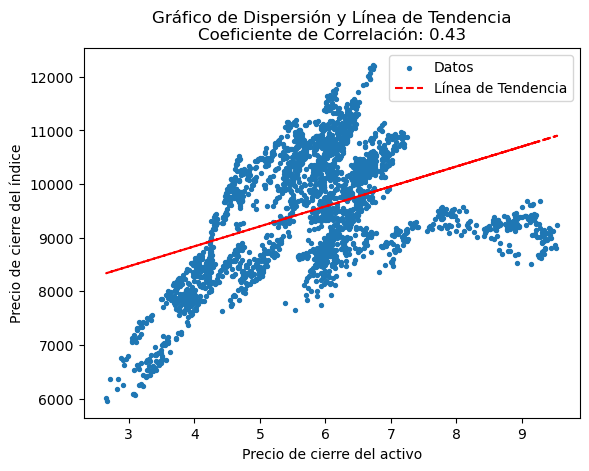

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión
# Crear el gráfico de dispersión
plt.scatter(df['Close_x'], df['Close_y'], label='Datos', s=8)

# Agregar la línea de tendencia
z = np.polyfit(df['Close_x'], df['Close_y'], 1)
p = np.poly1d(z)
plt.plot(df['Close_x'], p(df['Close_x']), "r--", label="Línea de Tendencia")

# Agregar el coeficiente de correlación al título
plt.title(f"Gráfico de Dispersión y Línea de Tendencia\nCoeficiente de Correlación: {correlation:.2f}")

# Agregar leyendas y etiquetas a los ejes
plt.xlabel('Precio de cierre del activo')
plt.ylabel('Precio de cierre del índice')
plt.legend()

plt.show()

# Nota de advertencias.
<font color='blue'>
Este note book se proporciona únicamente con fines educativos e informativos. No se debe considerar asesoramiento legal o financiero. No se ofrece ninguna garantía u otra promesa en cuanto a los resultados que se pueden obtener al usar su contenido.
    
En la medida máxima permitida por la ley, se nos exime de toda responsabilidad en caso de que cualquier información, comentario, análisis, opinión, consejo y / o recomendación se muestre inexacta, incompleta o poco confiable, o resulte en una inversión u otra pérdida. Se advierte que el rendimiento pasado no es un indicador confiable de resultados futuros.
    
Recuerde que ninguna estrategia de trading es infalible, y siempre existe un riesgo asociado al operar en los mercados financieros. Es esencial gestionar adecuadamente el riesgo y utilizar la estrategia junto con una gestión de capital adecuada. Además, es recomendable consultar con profesionales financieros o analistas antes de tomar decisiones de trading importantes.
    </font>